# An intro to quantum machine learning 🚀
(with one qubit!)

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


Since we will only use one qubit, we need to reduce the dimensionality of the data. For this, we will use Kernel PCA.

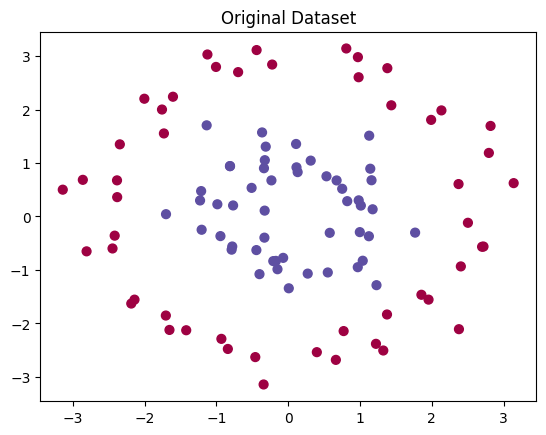

In [208]:
n_samples = 100

# Create the dataset
X, y = make_circles(n_samples=n_samples, noise=0.1, random_state=42, factor=0.4)

# Preprocess the dataset
scaler = MinMaxScaler((-np.pi, np.pi))
X = scaler.fit_transform(X)

# Plot the original dataset
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.title("Original Dataset")

plt.show()


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

## Variational Quantum Classifier

In [210]:
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import SPSA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap, ZFeatureMap

from qiskit.circuit import ParameterVector, Parameter, QuantumCircuit
from utils import plot_decision_boundary, statevectors_for_circuit, bloch_sphere_statevector_figure

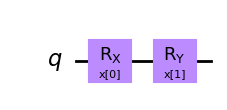

In [211]:
def build_data_encoding_circuit(data_dim=2):
    n_qubits = 1

    data_params = ParameterVector('x', data_dim)

    model_circuit = QuantumCircuit(n_qubits)
    model_circuit.rx(data_params[0], qubit=0)
    model_circuit.ry(data_params[1], qubit=0)
    
    return model_circuit

build_data_encoding_circuit().draw('mpl')

In [212]:
statevectors = statevectors_for_circuit(build_data_encoding_circuit(), X_train)
fig = bloch_sphere_statevector_figure(statevectors , y_train)
fig.show()

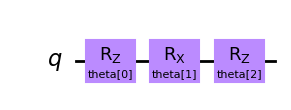

In [213]:
def build_param_transform_circuit(n_params=3):
    n_qubits = 1

    params = ParameterVector('theta', n_params)

    model_circuit = QuantumCircuit(n_qubits)
    model_circuit.rz(params[0], qubit=0)
    model_circuit.rx(params[1], qubit=0)
    model_circuit.rz(params[2], qubit=0)

    return model_circuit

build_param_transform_circuit().draw('mpl')

In [214]:
optimizer = SPSA(maxiter=100)
vqc = VQC(num_qubits=1,
        feature_map=build_data_encoding_circuit(),
        ansatz = build_param_transform_circuit(),
        loss = 'cross_entropy',
        optimizer = optimizer)

In [215]:
vqc.fit(X_train, y_train)

/Users/jonas/anaconda3/envs/QMLWorkshop/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [216]:
test_accuracy = vqc.score(X_test, y_test)
print(f'Testing success ratio: {test_accuracy}')

Testing success ratio: 0.9
Testing success ratio: 0.8


## Quantum Support Vector Machine

In [217]:
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from utils import plot_kernel_matrix

In [218]:
# Initialize the quantum kernel and QSVM
data_encoding_circuit = build_data_encoding_circuit()
kernel = FidelityQuantumKernel(feature_map=data_encoding_circuit)
qsvc = QSVC(quantum_kernel=kernel)

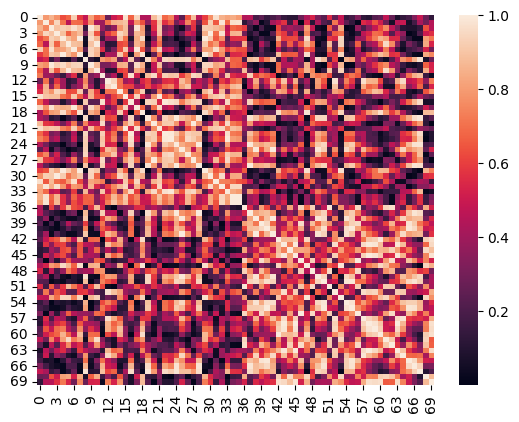

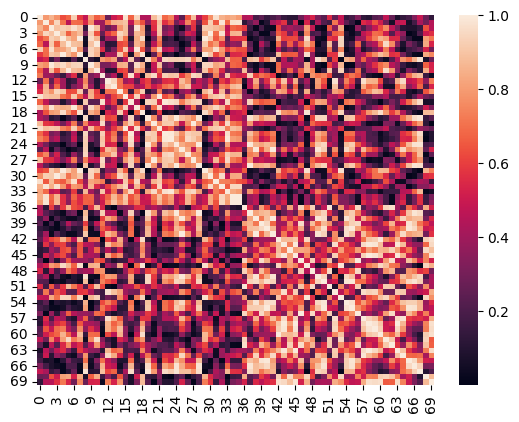

In [219]:
plot_kernel_matrix(X_train, y_train, data_encoding_circuit)

In [220]:
# fit the model
qsvc.fit(X_train, y_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7fe2f6adbe80>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.fidelity_quantum_kernel.FidelityQuantumKernel object at 0x7fe2f84f2df0>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [221]:
test_accuracy = qsvc.score(X_test, y_test)
print(f'Testing success ratio: {test_accuracy}')

Testing success ratio: 0.8
Testing success ratio: 0.8


## Now, it is your turn!

Try VQC and QSVM on the real-world dataset iris!